In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from sklearn import datasets

In [2]:
matplotlib.rcParams['figure.figsize'] = [20, 10]

In this note we would like to explain two concepts
* What classification is
* What Logistic Regression is.
* And finally, probably the most complicated here: How to evaluate classification.

## Classification problem

__Classification__ problem is a kind of supervised Machine Learning Algorithm whose target are set of discrete values (classes). 

There few kinds of classifications.

* __Binary classification__: when an observation can belong to just one of two classes. Here often there is just one class and we try to determine if an observation belongs to it or not.
* __Multiclass classification__:  when an observation can be belong to just one of many classes.
* __Multilabel classification__: When an observation can belong to zero or many classes.

__Example__

We would like to predict if a patient is sick or not based on her/his blood test. This is classification problem. Moreover, since we have just two classes it is also called __binary classification__.

__Example__

We would like to say if a given photo contains a _hot dog_. This is also binary classification.

__Example__
 
We would like tell what is on a given photo. For example [ImageNet](http://www.image-net.org/) is a large dataset with images with that have object of thousands of different classes. This a an example of __multiclass classification__. If one image can have more than one object we deal with __multilabel classification__.

## Logistic Regression

Logistic Regression, although called regression, is a __binary classification__ algorithm. Why is it called regression? It is because, the output of this algorithm is a probability, so it is a continuous number between zero and one. Let's look at example. Imagine that we would like to predict if a image contains a hot dog. So here we have to classes: first class `hot dog` contains images with a hot dog and the other `not a hot dog`, images that do not contain a hot dog. So we can label by `1` the first class and by `0` the second. Then the output of the _logistic regression_ algorithm is a probability of having a hot dog on a image. That is, if the output is `0.9` we are likely to see hot dog. On the other hand if the output in `0.03` than we are very likely to have an image without a hot dog.

So how we fit probabilities, that are numbers between zero and one into linear regression that produce output being unbounded real number? We use a function called __sigmoid__. This function is denoted by $\sigma$ and is defined by the formula:

$$\sigma(t) = \frac{1}{1+\exp(-t)}.$$


Let's plot it.

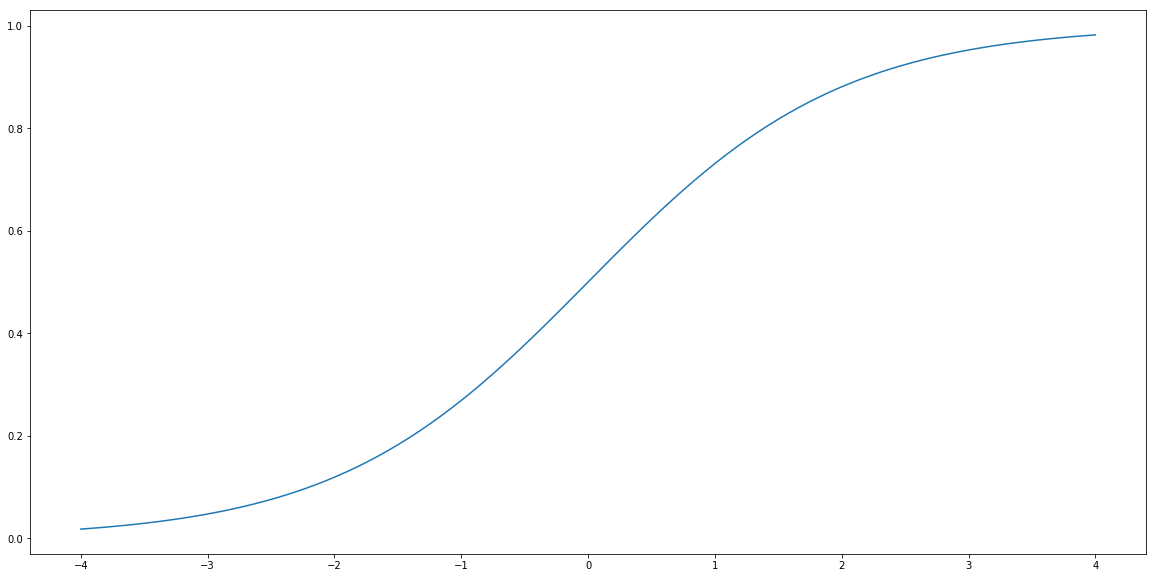

In [3]:
def sigmoid(t):
    return 1/(1+np.exp(-t))

t = np.linspace(-4, 4, 100)
plt.plot(t, sigmoid(t))

plt.show()

__Logistic Regression__ is a method that tries to find $a$ and $b$ such that $\hat{Y}$ given by the formula

$$\hat{Y} = \sigma(a X + b) = \frac{1}{1+\exp(a X + b)}$$

gives the best possible probabilities  that $X$ belongs of not to the class labeled by 1.

Let's see how it works with an example. 

## Dataset

Here we will study data extracted from images of a breast mass. We are going to predict if a tumor observed there is malignant or not. First we will try to address the following problem.

__Question__ Can we build a model that based on the radius of a tumor can classify if the tumor is malignant or not?

For that let's load our data.

In [4]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
list(data.target_names)

['malignant', 'benign']

In [5]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

So if target is 1 the tumor is __malignant__. Otherwise, if the target is 0, the tumor is __benign__.

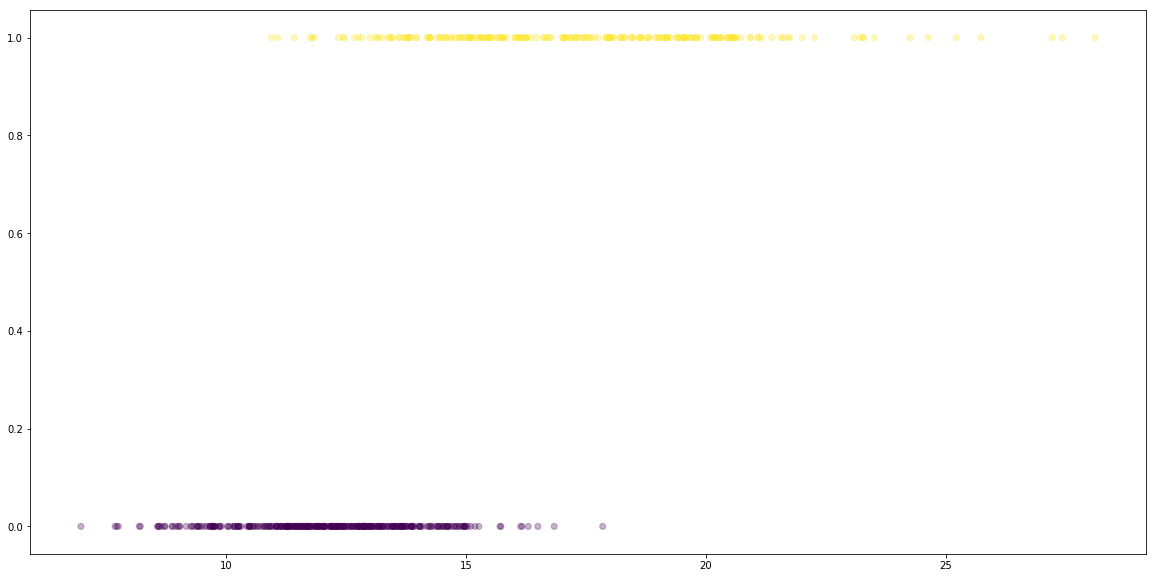

In [6]:
y = data.target == 0 # if zero then we dedect malignant tumor.

plt.scatter(data.data[:, [0]], y, alpha=0.3, c=y)
plt.show()

In [7]:
# 1. Prepare data
X = data.data[:, [0]] # only one column, radius
y = data.target == 0

# 2. Split data into train and test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)

# 3. Build a model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

# 4. Fit model to train data.
clf.fit(X_train, y_train)

# 5. Caluate prediction on test set
y_test_hat = clf.predict(X_test)

/home/bartek/Envs/py3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Before we get to evaluation we need to discuss how we are evaluate if classification models. Let us explain then few concepts:
* accuracy,
* confusion matrix,
* precision and recall.

## Evaluation 1: Accuracy

One way of evaluating a classification model is to calculate what percentage of classes we have predicted accurately. 

In [8]:
n_sample = len(y_test)
correct_prediction = sum(y_test == y_test_hat)

# Accuracy
correct_prediction/n_sample

0.9122807017543859

90%! not bad. 

The package `sklearn` has also convenient function that calculate accuracy score.

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_hat)

0.9122807017543859

We have said that the output of our model is not `1` or `0`, that is if the observation is respectively malignant or not malignant tumor. Our real output is a probability that the observation is malignant. So we have to choose with which probability it implies that the tumor is malignant. The package `sklearn` does it for us and choose 50%. Hence output `y_test_hat` is already `True` or `False`. 

However we can get also the probabilities. We can get them in `sklearn` using `predict_prob` method. It returns two columns, first is the probability of belonging to class `0` (benign cancer) and the second is the probability of belonging to class `1` (malignant cancer). They of course sum up to 1 and we only need the second column. 

In [10]:
y_test_proba = clf.predict_proba(X_test)[:, 1]
y_test_prediction = y_test_proba >= 0.5
correct_prediction = sum(y_test == y_test_prediction)

# Accuracy
correct_prediction/n_sample

0.9122807017543859

Later when we discuss _recall_ and _precision_, we will discuss when we choose 50% as a __threshold__ for the decision and when not. 

## Evaluation 2: Confusion matrix

Imagine that in our dataset there is only 5% of observation with malignant tumor. Then one can get 95% accuracy just by labeling all observations as benign. Is it a good model? Not at all.

One can address this problem using __confusion matrix__. Confusion matrix matrix shows us complete picture how many images were correctly and incorrectly classified. As columns we put what is actual class of the observation and on rows what we have predicted. The easiest way of understanding it is to look at our example.

In [11]:
true_positive = sum(y_test & y_test_prediction)
false_positive = sum(~y_test & y_test_prediction)
true_negative = sum(~y_test & ~y_test_prediction)
false_negative = sum(y_test & ~y_test_prediction)

pd.DataFrame({
        "Predicted 0": [true_negative, false_negative], 
        "Predicted 1": [false_positive, true_positive]
    },
    index= ["Actual 0", "Actual 1"]
)

,Predicted 0,Predicted 1
Actual 0,105,3
Actual 1,12,51


So we see that with respect to observations that were in class 0 (benign cancer) we have correctly classified 105 of them and 12 we have misclassified as malignant. And in the case on malignant observation we have 51 corrected predictions and 5 incorrect. 

Again, there is a convenient function in `sklearn` that can do it for us.

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_hat)
cm

array([[105,   3],
       [ 12,  51]])

One can get accuracy from confusion matrix by summing the number in the diagonal and then dividing it by the sum of all elements in the matrix. 

In [13]:
cm.diagonal().sum()/cm.sum()

0.9122807017543859

Finally, we will transform `cm` into `pandas.DataFrame` and nicely plot using function `heatmap` from package `seaborn`.

In [14]:
import seaborn as sns


def get_cm_df(cm):
    labels = [0, 1]
    cm_df = pd.DataFrame(cm, index=labels, columns=labels)
    cm_df.index.name = 'Actual'
    cm_df.columns.name = 'Predicted'
    return cm_df

cm_df = get_cm_df(cm)
cm_df

Predicted,0,1
Actual,,
0,105,3
1,12,51


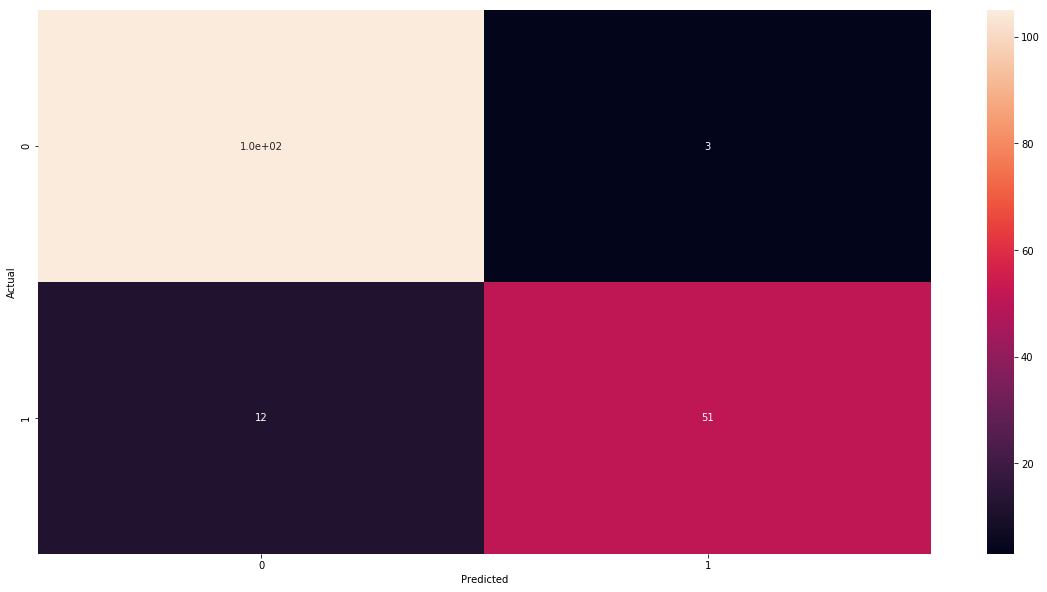

In [15]:
sns.heatmap(cm_df, annot=cm)
plt.show()

## Evaluation 3: Precision and recall

Confusion matrix is four number that shows the complete picture how our model works. We can simplify it a bit by two concepts: __precision__ and __recall__. __Precision__ (also called __positive predictive value__ (PPV)) measures how well we did with predicted positive examples. So it is defined by

$$\mathrm{Precision} = \frac{\mathrm{True\ positives}}{\mathrm{True\ positives} + \mathrm{False\ positives}}$$

And __recall__ (also called __sensitivity__, __hit rate__, or __true positive rate__ (TPR)) measures how well we did with actual positives. That is

$$\mathrm{Recall} = \frac{\mathrm{True\ positives}}{\mathrm{True\ positives} + \mathrm{False\ negatives}}$$

So in our case we have the following.

In [16]:
precision = true_positive/(true_positive + false_positive)
recall = true_positive/(true_positive + false_negative)
precision, recall

(0.9444444444444444, 0.8095238095238095)

Again we have convenient functions for calculating it.

In [17]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_test_hat), recall_score(y_test, y_test_hat)

(0.9444444444444444, 0.8095238095238095)

### Precision-recall trade-off

The best models have both precision and recall high. However, in general it is difficult to have both. But from a business perspective it sometimes important to focus on one of them. Moreover,  often we can increase one and sacrifice the other. We will see how we can do this with Logistic Regression model. But before let me illustrate the problem with two examples.

__Example__

Imagine that we work for on-line shop. We are building a model that detects if a customer is unhappy. When we detect it, we would like to send them a coupon for 20 Eur to be spend in out shop. Of course we do not want to sent it to many users only to that we are sure that they are unhappy. So here we need a model with high precision and we can sacrifice recall.

__Example__

Sometimes we rather prefer high recall. In the cancer detection, we would rather prefer to have benign tumor misclassified and then do some extra exams to confirm that, than malignant cancer misclassified and having a patient dead during next few years.

In the case of Logistic Regression we can easily improve one of precision or recall by playing with threshold. Let me show it.

First we set a decision threshold to 75% and see how precision and recall have changed.

In [18]:
def precision_recall(y_true, y_proba, threshold):
    y_hat = y_proba >= threshold
    precision = 1 if sum(y_hat) == 0 else precision_score(y_true, y_hat) # we set precision to 1 if 
                                                                         # there is no ones, this is a bit
                                                                         # techincal so do not worry
    return precision, recall_score(y_true, y_hat)

precision_recall(y_test, y_test_proba, .75)

(0.9714285714285714, 0.5396825396825397)

As you can see now we have increased the precision to 97% and the recall has dropped 54%. Let's look also at confusion matrix.

In [19]:
def cm_matrix_from_threshold(y_true, y_proba, threshold):
    y_hat = y_proba >= threshold
    return confusion_matrix(y_true, y_hat)


get_cm_df(cm_matrix_from_threshold(y_test, y_test_proba, .75))

Predicted,0,1
Actual,,
0,107,1
1,29,34


So now we have only 35 observation predicted as malignant (before was 54), but only one is misclassified (before was 3). The cost of this is that we have more observation classified as saved (benign) and much more of them misclassified.

Now we set a decision threshold to 25%.

In [20]:
precision_recall(y_test, y_test_proba, .25)

(0.5504587155963303, 0.9523809523809523)

We see that precision has dropped to 55% but now recall is high 95%.

So let's look at confusion matrix in order to find out why.

In [21]:
get_cm_df(cm_matrix_from_threshold(y_test, y_test_proba, .25))

Predicted,0,1
Actual,,
0,59,49
1,3,60


As we see, now among 63 malignant observations we have only 3 misclassified.

Finally, by varying threshold for zero to one and register corresponding precisions and recalls we can plot __precision-recall curve__.

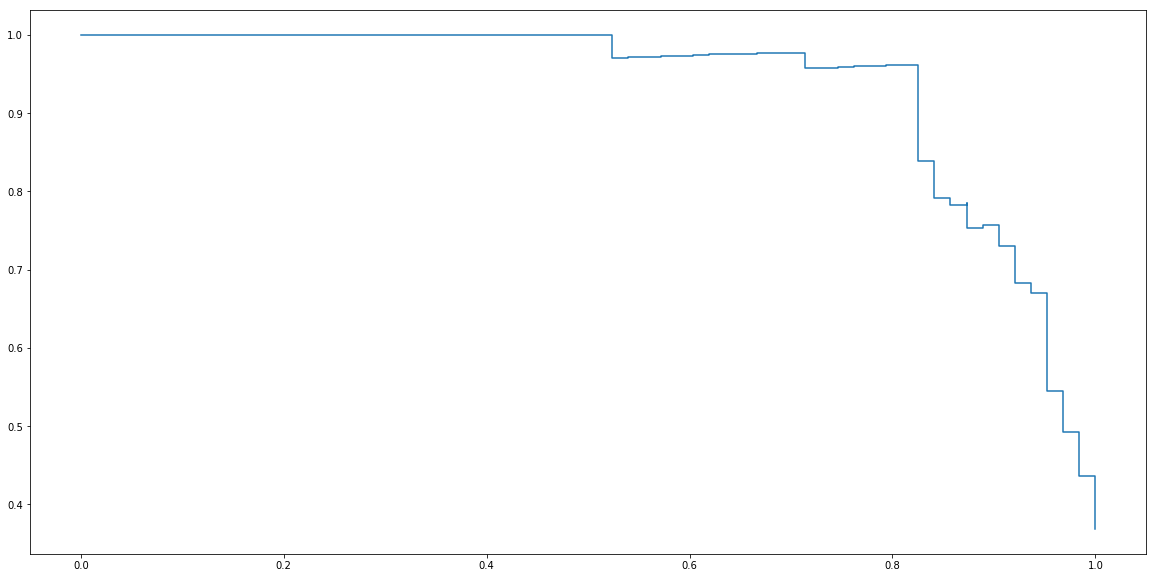

In [22]:
ts = np.linspace(0, 1, 100)
precisions = []
recalls = []
for t in ts:
    p,r = precision_recall(y_test, y_test_proba, t)
    precisions.append(p)
    recalls.append(r)
    
plt.step(recalls, precisions)
plt.show()

Package `sklearn` contains a function `precision_recall_curve` that calculate it for us. In order to use it, we need to provide `y_score` which are values of linear part of Logistic regression before applying _sigmoid_ function. They can be obtained using `decision_function` method.

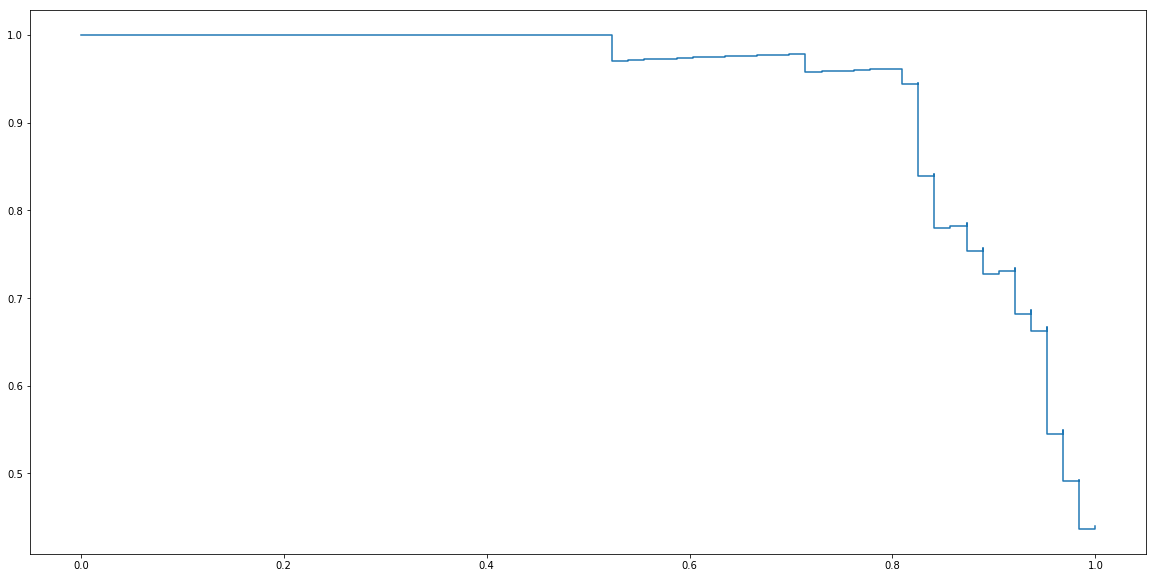

In [23]:
from sklearn.metrics import precision_recall_curve

y_test_score = clf.decision_function(X_test)
precisions, recalls, _ = precision_recall_curve(y_test, y_test_score)
plt.step(recalls, precisions)
plt.show()

### Evaluation 4: F-score

As we said before, the best models have both precision and recall high. However, when it comes to compare models having two numbers can be difficult. 

__Example__
Imagine situation when one model has precision, recall respectively equal to 0.7, 0.65, and to 0.66, 0.69. So which one is better?

In this kind of situation it is useful to have just one simple criterion. And here it is common to use a metric called __F-score__.(or F1-score) This metric is defined by the following formula.

$$\mathrm{F-score} = \frac{2}{\frac{1}{\textrm{Precision}} + \frac{1}{\textrm{Recall}}}.$$


__Example-continuation__
So in our example we can compare precisions and recalls using F-score. Let's do this.

In [24]:
def f_score(precision, recall):
    return 2/(1/precision + 1/recall)

f_score(0.7, 0.65), f_score(0.66, 0.69)

(0.674074074074074, 0.6746666666666666)

So the second one seems to be slightly better.

Now let's come back to cancer example and calculate f-score for it.

In [25]:
f_score(precision_score(y_test, y_test_hat), recall_score(y_test, y_test_hat))

0.8717948717948718

Or using function form `sklearn`.

In [26]:
from sklearn.metrics import f1_score

f1_score(y_test, y_test_hat)

0.8717948717948718

### Evaluation 5: AUC - Area under ROC curve

Let us finish with another very important evaluation. The problem is F-score is that, when we change threshold the F-score can also change. So what is a solution? One is to use the area under precision-recall curve we have seen before. And it is sometimes used. However, much more popular is the area under ROC curve. This metric is called __AUC__. 

### ROC curve

ROC curve is very similar to precision-recall curve, but instead of precision it uses __false positive rate__ (FPR) also called fall-out. FPR is defined by the following formula.

$$\mathrm{FPR} = \frac{\mathrm{False\ positives}}{\mathrm{False\ positives} + \mathrm{True\ negatives} }$$

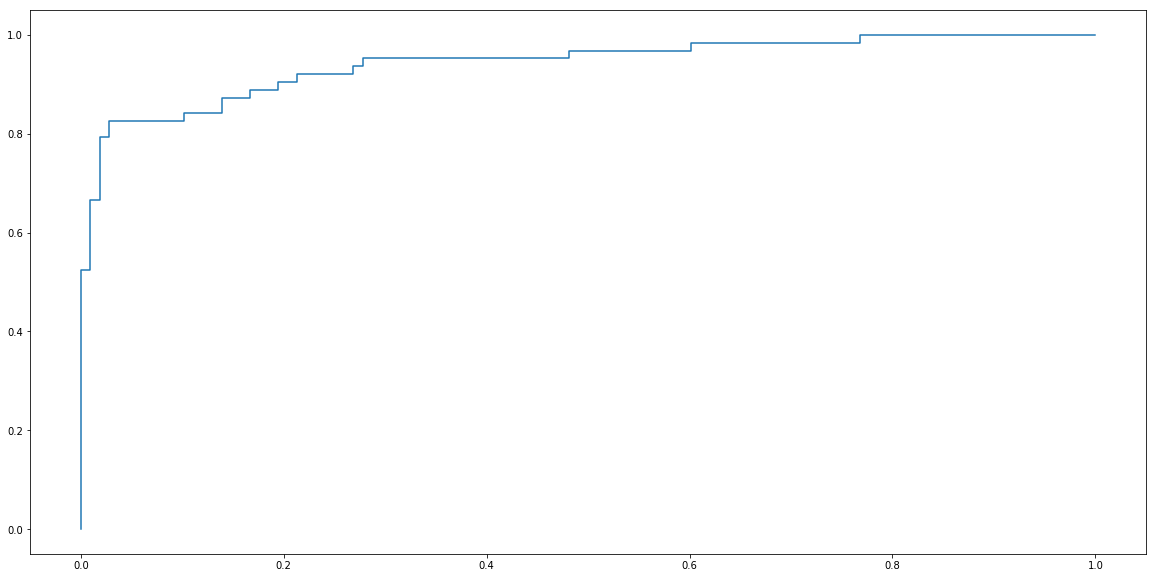

In [27]:
def fpr(y_true, y_pred):
    false_positive = sum(~y_true & y_pred)
    true_negative = sum(~y_true & ~y_pred)
    return false_positive/(false_positive + true_negative)

def fpr_recall(y_true, y_proba, threshold):
    y_hat = y_proba >= threshold
    fpr_score = fpr(y_true, y_hat)
    return fpr_score, recall_score(y_true, y_hat)

ts = np.linspace(0, 1, 100)
fprs = []
recalls = []
for t in ts:
    f,r = fpr_recall(y_test, y_test_proba, t)
    fprs.append(f)
    recalls.append(r)
    
plt.step(fprs, recalls)
plt.show()

Again, package `sklearn` contains convenient function for calculating ROC curve.

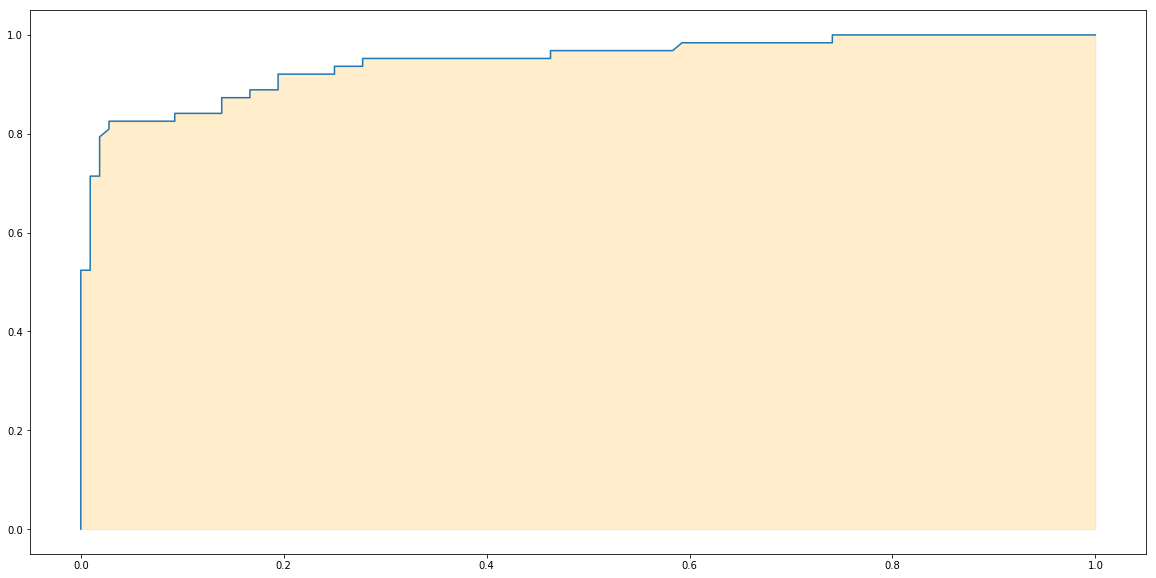

In [28]:
from sklearn.metrics import roc_curve

y_test_score = clf.decision_function(X_test)
fprs, recalls, _ = roc_curve(y_test, y_test_score)

plt.plot(fprs, recalls)
plt.fill_between(fprs, recalls, alpha=0.2, color='orange')
plt.show()

Finally the area under the ROC curve is __AUC__. Let's use a function from `sklearn` to calculate it.

In [29]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_test_score)

0.9444444444444444

__Extra__ There is also another curious way of calculating __AUC__. What we do we form all possible pairs of observation $(y_i, y_j)$ where $y_i$ is an negative observation (labeled with 0) and $y_j$ is a positive example (labeled with 1). Then we calculate if the scores (or probabilities) are in the right order, that is if the score of the observation i is lower than the score for the observation j. Then we calculate the fractions of corrected pairs to the all possible pair. 

The following code implement it. And as you see the value is very close to the value given by `roc_auc_score` method from `sklearn` package.

In [30]:
total_count = 0
corrects = 0
for i in range(len(y_test)):
    if y_test[i] == 1:
        for j in range(len(y_test)):
            if y_test[j] == 0:
                total_count += 1
                if y_test_score[i] > y_test_score[j]:
                    corrects += 1
                
corrects/total_count

0.9442974720752498

## Everything together

In [31]:
# 1. Prepare data
X = data.data[:, [0]]
y = data.target == 0

# 2. Split data into train and test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)

# 3. Build a model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

# 4. Fit model to train data.
clf.fit(X_train, y_train)

# 5. Evaluate model on test data.
y_test_hat = clf.predict(X_test)
y_test_score = clf.decision_function(X_test)
print("AUC :", roc_auc_score(y_test, y_test_score))
print("F1-score :", f1_score(y_test, y_test_hat))
print("Precision :", precision_score(y_test, y_test_hat))
print("Recall :", recall_score(y_test, y_test_hat))
print("Accuracy score :", accuracy_score(y_test, y_test_hat))



AUC : 0.9444444444444444
F1-score : 0.8717948717948718
Precision : 0.9444444444444444
Recall : 0.8095238095238095
Accuracy score : 0.9122807017543859


/home/bartek/Envs/py3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Multiple Logistic Regression

Now we can easily generalize Logistic Regression with one exploratory variable to many variables the same way we can generalize Linear Regression to Multiple Linear Regression. So __Multiple Logistic Regression__ is a model that have $n+1$ parameters $a_0$, $a_1$,... $a_n$ and $b$ and it is given by formula:

$$\hat{y} = \sigma(a_0x_0 + a_1x_1 + \ldots + a_nx_n + b) = \frac{1}{1+\exp(a_0x_0 + a_1x_1 + \ldots + a_nx_n + b)}.$$

Actually the code is very simple and almost the same as before. Let us solve the following problem?

__Question__ Can we build a model that predict if tumor is malignant that depends on radius, texture and perimeter?

In [32]:
# 1. Prepare data
X = data.data[:, [0, 1, 2]]
y = data.target == 0

# 2. Split data into train and test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)

# 3. Build a model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

# 4. Fit model to train data.
clf.fit(X_train, y_train)

# 5. Evaluate model on test data.
y_test_hat = clf.predict(X_test)
y_test_score = clf.decision_function(X_test)
print("AUC :", roc_auc_score(y_test, y_test_score))
print("F1-score :", f1_score(y_test, y_test_hat))
print("Precision :", precision_score(y_test, y_test_hat))
print("Recall :", recall_score(y_test, y_test_hat))
print("Accuracy score :", accuracy_score(y_test, y_test_hat))

AUC : 0.9591416813639035
F1-score : 0.8571428571428571
Precision : 0.9107142857142857
Recall : 0.8095238095238095
Accuracy score : 0.9005847953216374


/home/bartek/Envs/py3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Observe that this model has slightly better AUC score, but its f-score is lower. It is not easy to decide what is better, however, once you make up your mind try to stick to it and do not change for one that is more convenient to you at the moment.

## Exercise

Now it's your turn. There are much more variables over there.

1. Could you find if there is another one that makes better fit? 
2. Or there is a combination of them that produce a better model?

Use __train-dev-test split__ and __AUC score__ as a criterion for selecting the best model. Would you choose the same model if you have been using __f-score__?

__To be continued__

_Updated: 2019-02-19_